In [1]:
from IPython.core.display import display, HTML

In [2]:
import numpy as np, scipy.stats, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.cluster import KMeans

We&lsquo;ll start by reading in the Excel spreadsheet containing the data. Notice that there are many blanks, where students skipped questions or wrote something incomprehensible. I also discounted nonsense responses such as where a student blindly chose 3 for every answer.

In [3]:
survey = pd.read_excel('survey.xlsx')

In [4]:
survey.head(5)

,Grade,Class,English is one of my favorite subjects.,English is one of my most challenging subjects.,I often don’t understand what’s going on in English class.,I believe it’s important to learn English.,I receive a lot of help from the other students.,I find the other students distracting.,"If the teachers at our school were less strict, I would learn more.","When I have a question, I tend to ask Max.",...,More videos,More games,More partner/group activities,More competitions,More presentations,More of something else,Do you attend an English hagwon?,Do you get one-on-one tutoring in English?,Is there anything else you want Max to know?,What temperature should we put the A/C at?
0,3,2,1.0,5.0,5.0,1.0,3.0,3.0,3.0,3.0,...,5.0,5.0,4.0,2.0,2.0,NaN,0.0,0.0,NaN,NaN
1,3,2,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,...,4.0,4.0,3.0,3.0,3.0,NaN,0.0,0.0,NaN,18.0
2,3,2,3.0,4.0,3.0,5.0,3.0,4.0,3.0,4.0,...,4.0,4.0,3.0,2.0,3.0,NaN,1.0,0.0,NaN,NaN
3,3,2,4.0,3.0,2.0,5.0,3.0,4.0,1.0,3.0,...,5.0,3.0,2.0,1.0,1.0,NaN,1.0,0.0,NaN,24.0
4,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,20.0


In [5]:
pd.DataFrame(survey.count())
# Basic count plot showing how many responses there were to each question (154 surveys received total)

,0
Grade,154
Class,154
English is one of my favorite subjects.,140
English is one of my most challenging subjects.,140
I often don’t understand what’s going on in English class.,139
I believe it’s important to learn English.,139
I receive a lot of help from the other students.,139
I find the other students distracting.,137
"If the teachers at our school were less strict, I would learn more.",139
"When I have a question, I tend to ask Max.",139


In [6]:
results = pd.DataFrame(scipy.stats.ttest_1samp((survey.iloc[:,2:16]),3, nan_policy='omit')).T
results.index = survey.columns[2:16]
results.columns = ['T-score','p-value']
results['sig'] = results['p-value'] < 0.05
results
# Table of T-scores, p-values, and significance indicated at p < 5% level

,T-score,p-value,sig
English is one of my favorite subjects.,-2.317269,2.194986e-02,True
English is one of my most challenging subjects.,3.698667,3.112224e-04,True
I often don’t understand what’s going on in English class.,-0.260610,7.947818e-01,False
I believe it’s important to learn English.,9.045063,1.232238e-15,True
I receive a lot of help from the other students.,1.485556,1.396776e-01,False
I find the other students distracting.,-10.515820,2.703568e-19,True
"If the teachers at our school were less strict, I would learn more.",-2.833684,5.292320e-03,True
"When I have a question, I tend to ask Max.",0.699360,4.855040e-01,False
"In general, Max is too lenient.",6.384556,2.436997e-09,True
More videos,16.546047,1.440986e-34,True


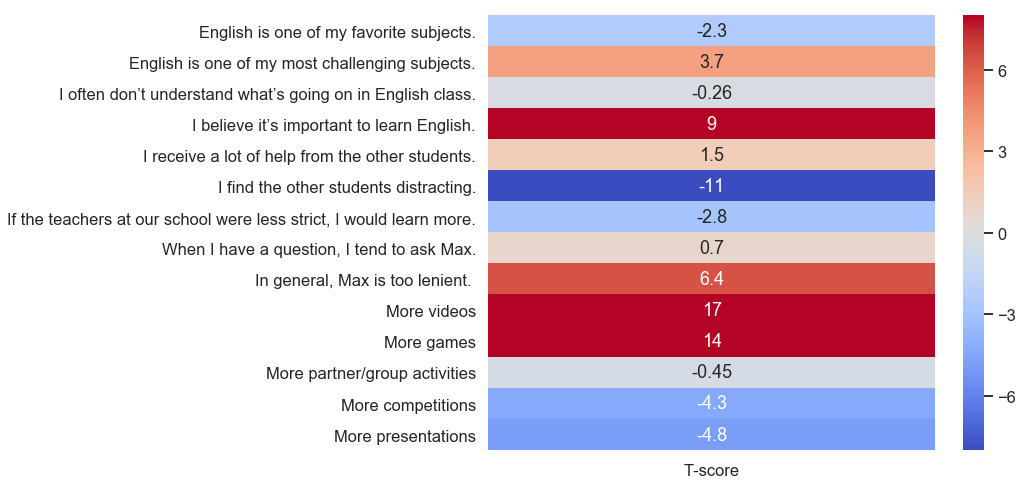

In [7]:
sns.set(context='talk',rc={'figure.figsize':(10,8)})
sns.heatmap(data=  results[['T-score']], # double brackets return it as a df instead of series
            cmap=  'coolwarm',
            annot= True,
            vmin= -8.01, 
            vmax=  8.01 ) 

# Heat map of T-scores from above. This is better visualized, however, by the bar graph below.

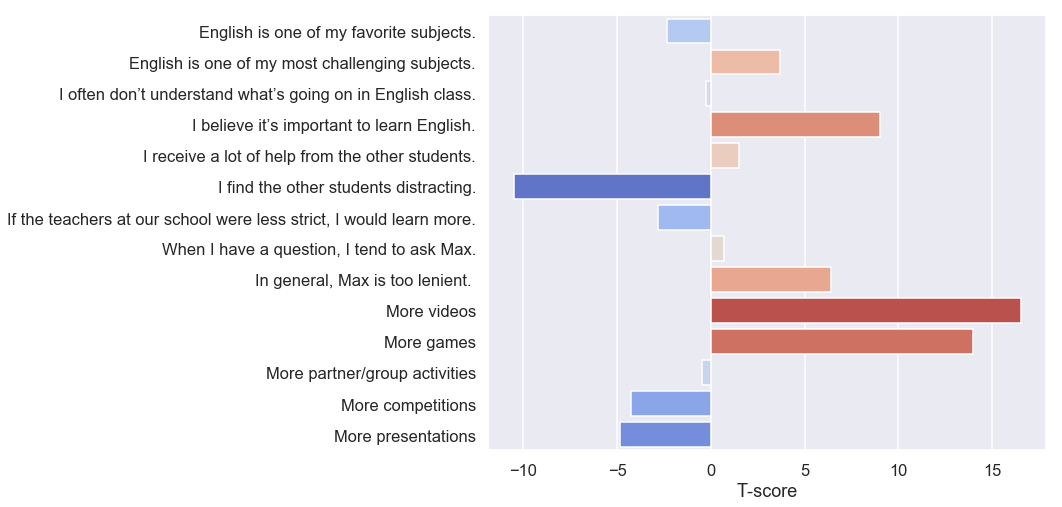

In [8]:
# From a helpful guy on SE
# https://stackoverflow.com/questions/57601156/change-axis-along-which-pandas-applies-color-palette/57601461?noredirect=1#comment101680212_57601461
val_order = results['T-score'].rank(method='max').astype(int) # rank ordered values in column 't'
val_index = val_order - 1 # convert for use as a list index
colors = sns.color_palette('coolwarm', len(results.index)) # list of N colors spaced along coolwarm
palette = [colors[x] for x in val_index] # re-order colors with increasing value of 't'

sns.set(context='talk',rc={'figure.figsize':(10,8)})
sns.barplot(data=  results,
        y=     results.index,
        x=     'T-score', 
        palette= palette)

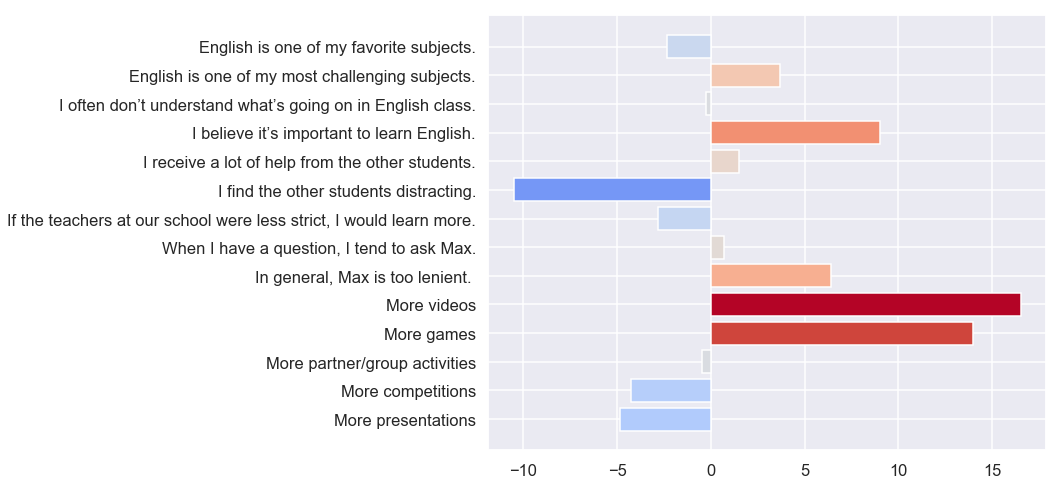

In [9]:
# better version, also from SE
sns.set(context='talk',rc={'figure.figsize':(10,8)})

absmax = np.abs(results['T-score'].values).max()
norm = plt.Normalize(-absmax, absmax)
cmap = plt.get_cmap("coolwarm")
colors = cmap(norm(results['T-score'].values))
plt.barh("index", "T-score", data=results.reset_index(), color=colors)

plt.gca().invert_yaxis()
plt.show()

In [10]:
# As the above obscures differences between the classes and grades, we'll do something similar on a pivot table

classbreakdown = survey.iloc[:,:16].pivot_table(index=['Grade','Class'],
                                                aggfunc=(lambda x: scipy.stats.ttest_1samp(x,3, nan_policy='omit')[0]))
    # Aggfunc above is computing T-scores centered around 3
classbreakdown = np.round(classbreakdown,decimals=1)
classbreakdown = classbreakdown[survey.columns[2:16]].T
    # Restores original column order

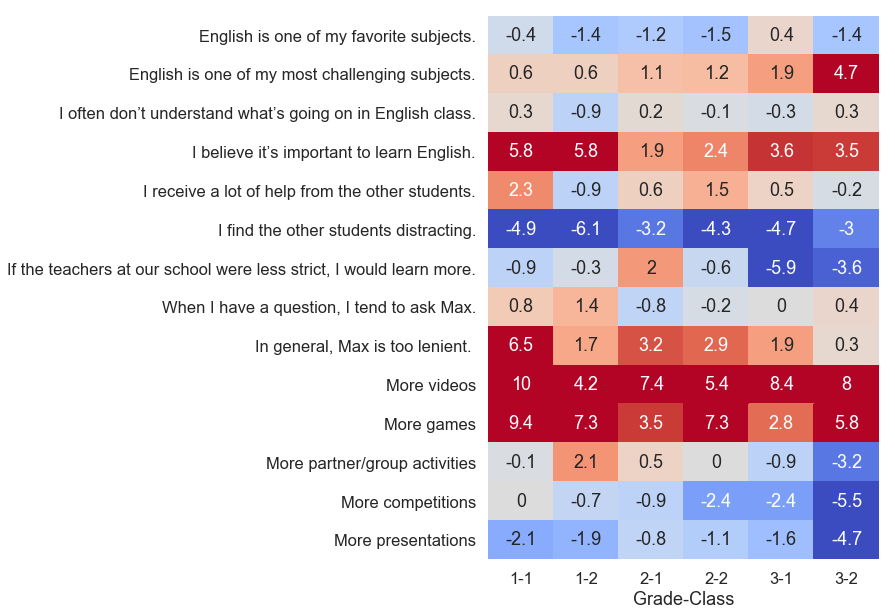

In [11]:
sns.set(context='talk',rc={'figure.figsize':(7,10)})
sns.heatmap(classbreakdown,cmap="coolwarm",cbar=False,vmin=-4,vmax=4,annot=True)
#sns.heatmap(classbreakdown.iloc[2:16],annot=True,vmin=1,vmax=5,cmap="coolwarm")

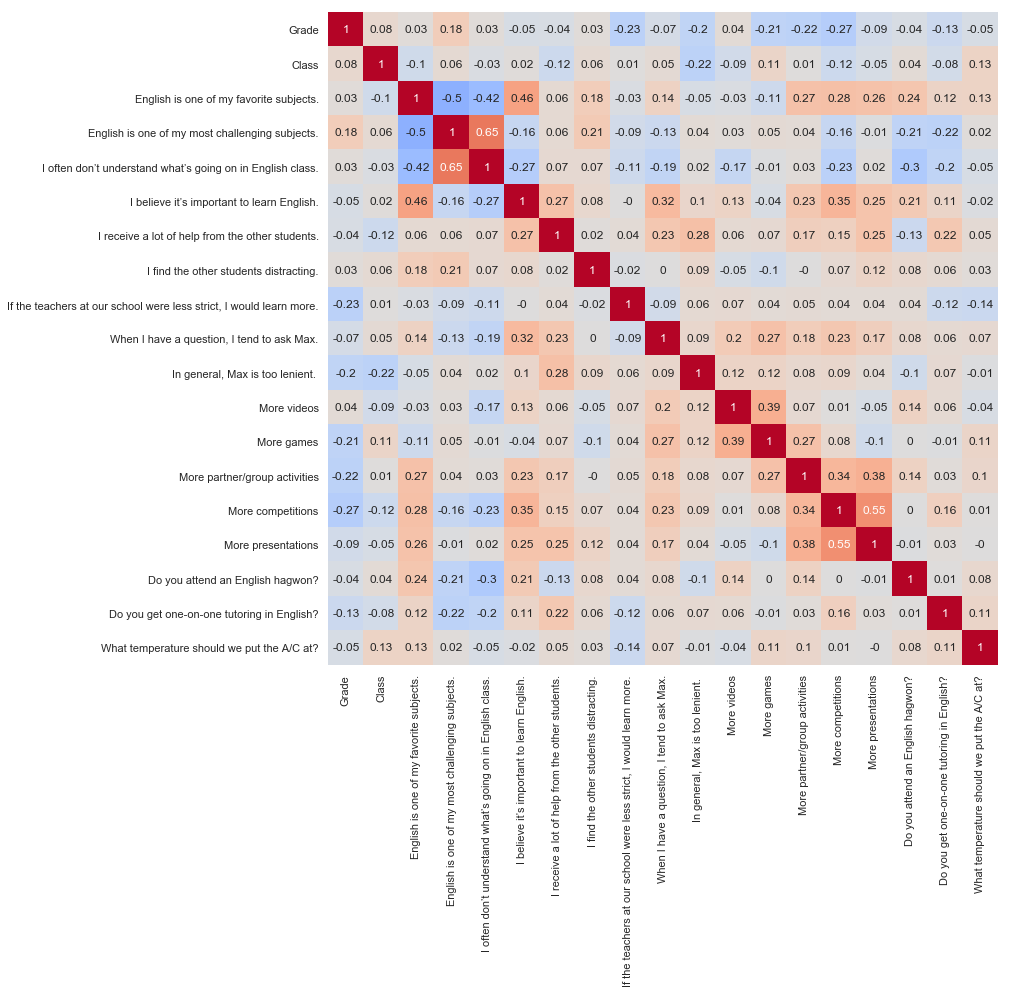

In [12]:
# r between all the quantitative questions.
# Note especially the perceived importance column.
# Also negative correlation between hagwon and challenge, difficulty understanding.
# Lenience questions had little to do with perceived challenge or anything.

sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(np.round(survey.corr(),decimals=2),
            cmap="coolwarm",
            cbar=False,
            vmin=-1,
            vmax= 1,
            annot=True)

In [13]:
imputed = survey.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18]] # Select class-relevant quantitative features
imputed = imputed.apply(lambda x: x.fillna(x.mean()),axis=0) # Impute nans with column averages

In [14]:
model = KMeans(n_clusters= 3, random_state=1987)
model.fit(imputed)
survey['Cluster'] = model.predict(imputed)

In [15]:
clusterbreakdown = survey.iloc[:,[2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18,21]].pivot_table(index=['Cluster'])
clusterbreakdown = np.round(clusterbreakdown,decimals=2)
clusterbreakdown = clusterbreakdown[survey.columns[[2, 3, 4, 5, 6, 7, 8, 9, 10, 17, 18]]]
clusterbreakdown['Number in cluster']= survey['Cluster'].value_counts(sort=None)
clusterbreakdown = clusterbreakdown.T
    # Restores original column order

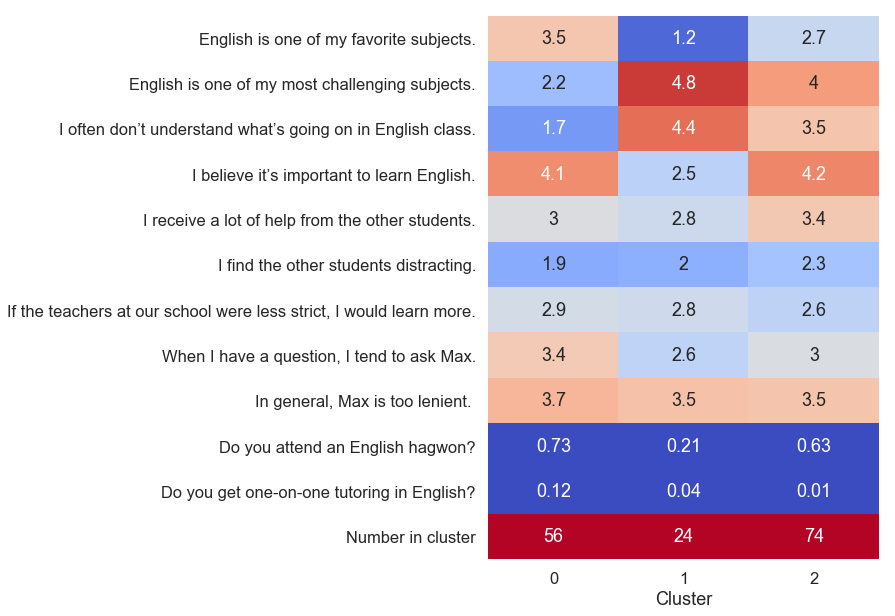

In [16]:
sns.set(context='talk',rc={'figure.figsize':(7,10)})
sns.heatmap(clusterbreakdown,cmap="coolwarm",cbar=False,vmin=1,vmax=5,annot=True)

In [17]:
scipy.stats.trim_mean(survey['What temperature should we put the A/C at?'].dropna(inplace= False),.1)

20.87264150943396